# Sistemas de ecuaciones lineales

En este notebook vamos a ver conceptos basicos para resolver sistemas de ecuaciones lineales.

La estructura de esta presentación está basada en http://nbviewer.ipython.org/github/mbakker7/exploratory_computing_with_python/blob/master/notebook_adv2/py_exp_comp_adv2_sol.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Sistemas de ecuaciones lineales

Un ejemplo de un sistema de ecuaciones lineales puede ser el siguiente


$
\begin{split}
a_{11} x_1 + a_{12} x_2+  a_{13}x_3 = b_1 \\
a_{21} x_1 + a_{22} x_2+ a_{23} x_3 = b_2 \\
a_{31} x_1 + a_{32} x_2+ a_{33} x_3 = b_3 \\
\end{split}
$

que puede ser escrito de manera matricial como $Ax = b$, donde la solución se puede escribir como $x=A^{-1}b$. Esto motiva el desarrollo de métodos para encontrar la inversa de una matriz.

In [2]:
#usando numpy se pueden resolver sistemas de este tipo.
A = np.array([[4.0,3.0,-2.0],[1.0,2.0,1.0],[-3.0,3.0,2.0]])
b = np.array([[3.0],[2.0],[1.0]])
b = np.array([[3.0],[2.0],[1.0]])

sol = np.linalg.solve(A,b)
print(A)
print(b)
print("sol",sol)
print(np.dot(A,sol))

#la inversa se puede encontrar como
Ainv = np.linalg.inv(A)
print("Ainv")
print(Ainv)
print("A * Ainv")
print(np.dot(A,Ainv))

[[ 4.  3. -2.]
 [ 1.  2.  1.]
 [-3.  3.  2.]]
[[ 3.]
 [ 2.]
 [ 1.]]
sol [[ 0.48275862]
 [ 0.5862069 ]
 [ 0.34482759]]
[[ 3.]
 [ 2.]
 [ 1.]]
Ainv
[[-0.03448276  0.4137931  -0.24137931]
 [ 0.17241379 -0.06896552  0.20689655]
 [-0.31034483  0.72413793 -0.17241379]]
A * Ainv
[[  1.00000000e+00   0.00000000e+00  -5.55111512e-17]
 [ -5.55111512e-17   1.00000000e+00   2.77555756e-17]
 [ -1.11022302e-16   0.00000000e+00   1.00000000e+00]]


### Construyendo un sistemas de ecuaciones lineales

Tenemos ahora el ejemplo siguiente. Tenemos tres puntos en el plano (x,y) y queremos encontrar la parábola que pasa por esos tres puntos.
La ecuación de la parábola es $y=ax^2+bx+c$, si tenemos tres puntos $(x_1,y_1)$, $(x_2,y_2)$, $(x_3,y_3)$ podemos definir el siguiente sistema de ecuaciones lineales.

$
\begin{split}
x_1^2a+x_1b+c&=y_1 \\
x_2^2a+x_2b+c&=y_2 \\
x_3^2a+x_3b+c&=y_3 \\
\end{split}
$

Que en notación matricial se ven así

$
\left(
\begin{array}{ccc}
x_1^2 & x_1 & 1 \\
x_2^2 & x_2 & 1 \\
x_3^2 & x_3 & 1 \\
\end{array}
\right)
\left(
\begin{array}{c}
a \\b \\c \\
\end{array}
\right)
=
\left(
\begin{array}{c}
y_1 \\
y_2 \\
y_3 \\
\end{array}
\right)
$

Vamos a resolver este sistema lineal, asumiendo que los tres puntos son: $(x_1,y_1)=(-2,2)$, $(x_2,y_2)=(1,-1)$, $(x_3,y_3)=(4,4)$

In [3]:
#primero construimos las matrices A y b
xp = np.array([-2, 1,4])
yp = np.array([ 2,-1,4])
A = np.zeros((3,3))
b = np.zeros(3)
for i in range(3):
    A[i] = xp[i]**2, xp[i], 1  # Store one row at a time
    b[i] = yp[i]
print('Array A: ')
print(A)
print('b: ',b)

Array A: 
[[  4.  -2.   1.]
 [  1.   1.   1.]
 [ 16.   4.   1.]]
b:  [ 2. -1.  4.]


solution is:  [ 0.44444444 -0.55555556 -0.88888889]
A dot sol:  [ 2. -1.  4.]


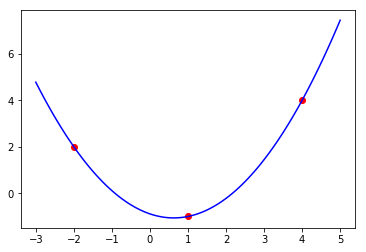

In [4]:
#ahora resolvemos el sistema lineal y graficamos la solucion
sol = np.linalg.solve(A,b)
print('solution is: ', sol)
print('A dot sol: ', np.dot(A,sol))
plt.plot([-2,1,4], [2,-1,4], 'ro')
x = np.linspace(-3,5,100)
y = sol[0]*x**2 + sol[1]*x + sol[2]
plt.plot(x,y,'b')

### Ejercicio 1

Tomen las mediciones de una cantidad $y$ a diferentes tiempos $t$: $(t_0,y_0)=(0,3)$, $(t_1,y_1)=(0.25,1)$, $(t_2,y_2)=(0.5,-3)$, $(t_3,y_3)=(0.75,1)$. Estas medidas son parte de una función periódica que se puede escribir como

$y = a\cos(\pi t) + b\cos(2\pi t) + c\cos(3\pi t) + d\cos(4\pi t)$

donde $a$, $b$, $c$, and $d$ son parámetros. Construya un sistema de ecuaciones lineales y encuentre el valor de estos parámetros. Verifique su respuesta haciendo una gráfica.

# Mínimos cuadrados

Volvamos por un momento al ejercicio de la parábola. Que pasaría si en realidad tuviéramos 10 mediciones? En ese caso la matriz $A$ sería de 10 por 3 y no podríamos encontrar una inversa. Aún así es interesante el problema de encontrar los parámetros de la parábola a partir de las mediciones. Aunque en este caso tenemos que olvidarnos de que la parábola pase por todos los puntos experimentales porque en general no lo va a hacer.

Para este caso tenemos que definir un criterio para decir que los parámetros son los mejores. Un posible criterio es que la suma de los cuadrados entre la curva teórica y los datos sea mínima. ¿Cómo podemos entonces encontrar una solución para este caso?

Cambiando un poco la notación pensemos que tenemos un vector $d$ de datos, un vector $m$ con los parámetros del modelo que queremos encontrar y una matriz $G$ que resume la información sobre la teoría físca que queremos utilizar para explicar los datos. De esta manera el problema se podría escribir como 

$G m = d$

Donde $G$ en general no es invertible. Pero usando el criterio de mínimos cuadrados vamos a tener que el vector $m$ en realidad puede ser estimado por un vector $\hat{m}$ que cumple la siguiente condición

$G^T G \hat{m} = G^{T}d$

donde $T$ indica la transpuesta. Si ahora escribimos $G^{T}G=A$, $\hat{m}=x$ y $G^{T}d=b$ volvemos al problema del principio y podemos encontrar fácilmente a $\hat{m}$

### Ejercicio 2
Los datos siguientes
https://raw.githubusercontent.com/ComputoCienciasUniandes/MetodosComputacionales/master/ejercicios/2018-10/05.SistemasEcuaciones/tendencia.dat

Representan una coordenada temporal y una coordenada espacial de un movimiento unidimensional en un campo gravitacional. Encuentre el mejor valor posible de la posición inicial, velocidad inicial y gravedad. Verifique que sus valores son razonables con una gráfica.

In [ ]:
data = np.loadtxt("tendencia.dat")
plt.scatter(data[:,0], data[:,1])